In [1]:

import edward as ed
import edward.models as edm
import tensorflow as tf
import numpy as np
import pymisca.numpy_extra as pynp
# import tensor
import pymisca.util as pyutil
import pymisca.vis_util as pyvis
import pymisca.tensorflow_extra as pytf;reload(pytf)
edm = pytf.edm

import models as mym
# pytf.sphereUniformDiag()
# edm.sphereUniformDiag
i = 0




/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network
<class 'models.ModelA'> {'name': 'test'}
<models.ModelA object at 0x7f6700bbaf90> {'name': 'test'}



      - _forward_event_shape_tensor,
      - _forward_event_shape (optional),
      - _inverse_event_shape_tensor,
      - _inverse_event_shape (optional).
      1. Sampling (e.g., `sample`) only requires `_forward`.
      2. Probability functions (e.g., `prob`, `cdf`, `survival`) only require
         `_inverse` (and related).
      3. Only calling probability functions on the output of `sample` means
        `_inverse` can be implemented as a cache lookup.        

      - `_forward`,
      - `_inverse`,
      - `_inverse_log_det_jacobian`,
      - `_forward_log_det_jacobian` (optional).        
        

In [4]:
from tensorflow.python.framework import ops
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import linalg_ops
from tensorflow.python.ops import math_ops
# math_ops.constant_op.constant()
# ops.containeron
array_ops.constant(0.)

<tf.Tensor 'Const:0' shape=() dtype=float32>

((5000,), (5000,), (5000,))
xshape (5000, 2)
forward_sp (5000, 2)
forward_xy (5000, 2) (5000, 2)
xshape (5000,)
forward_sp (5000,)
forward_xy (5000,) (5000,)
((5000,), (5000, 2), (5000,))
(1.1447297, -1.1447297)


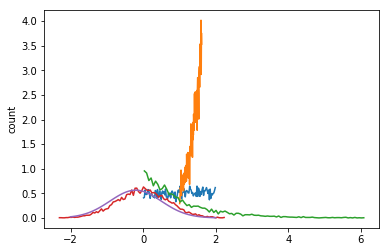

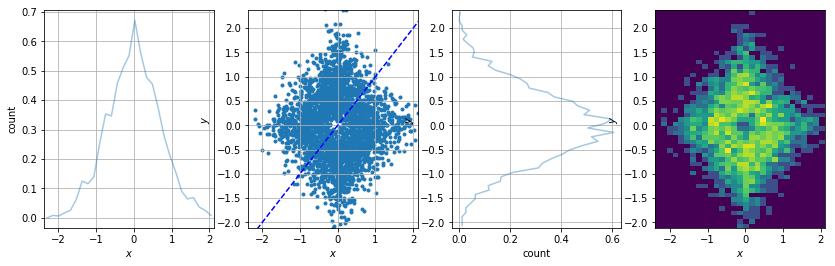

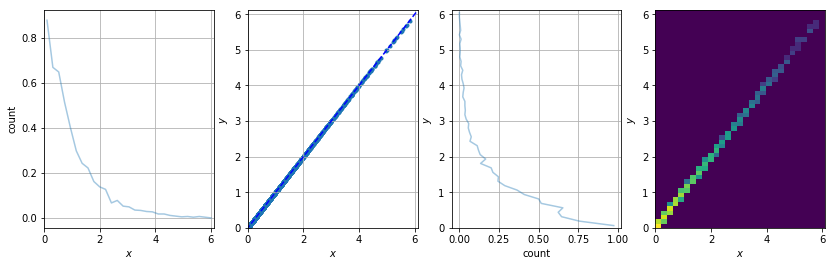

In [2]:
reload(pytf)
import scipy.stats as spstat

def test__bijector(bjt,event_shape=None,udist = None):
#     bjt = tf.contrib.distributions.bijectors.Exp()
    udist = tf.contrib.distributions.Uniform(low=0.,high=2.) if udist is None else udist
    odist = pytf.TransformedDistribution(bijector=bjt,
                                                             distribution=udist,
                                                            event_shape = event_shape)
    X = udist.sample((5000,)).eval()
    Y = odist.sample((5000,)).eval()
    Xrec = bjt.inverse(bjt.forward(X)).eval()
    print (X.shape,Y.shape,Xrec.shape)
    pyvis.histoLine(X.ravel(),normed=1)
    pyvis.histoLine(Y.ravel(),normed=1)
    
    return odist,(X,Y,Xrec)

sess = tf.InteractiveSession()
with sess.as_default():
    D = 2
    bjt = tf.contrib.distributions.bijectors.PowerTransform(power=5.)
    test__bijector(bjt)
    bjt = pytf.RadialTransform(power=5.,D = D,debug=1)
    
#     udist = None
    udist = tf.contrib.distributions.Gamma(concentration= (D)/2. ,rate = 1.)
#     udist = tf.contrib.distributions.Chi2(2.)

    odist,(X, Y, Xrec) = test__bijector(bjt,event_shape=[D],udist = udist)
    xs=  np.linspace(-2,2,100)
    rv = spstat.norm(loc = Y.mean(),scale=Y.std())
    ys = rv.pdf(xs+0.2)
#     ys = np.exp(-xs**2/2.)
    pyvis.plt.plot(xs,ys)
    pyvis.qc_2var(Y[:,0],Y[:,1])
    pyvis.qc_2var(X,Xrec)
    d1 = bjt.forward_log_det_jacobian(X)
    d2 = bjt.inverse_log_det_jacobian(Y)
    print( d1.eval().mean(),d2.eval().mean())

    # bjt.forward(tf.contrib.distributions.Uniform(low=0.,high=1.).sample(10))

In [3]:
####

for D in [2,3,4,5]:
#     D = 3
    udist = tf.contrib.distributions.Uniform(low=0.,high=2.) 
    odist = pytf.AsRadial(udist,D=D)

    N = 1000000
    R = 6.
    # Xu = np.random.uniform(-R,R,size=[N,D])
    Xu = np.random.random(size=[N,D]) - 0.5
    Xu = Xu * R
    Xu = Xu.astype(np.float32)
    p = odist.prob(Xu,).eval()
    val = p.mean() * (R)**D
    print ('In R^%d, integrate to: %.3f'%(D,val) )
# p.mean()

In R^2, integrate to: 1.000
In R^3, integrate to: 0.997
In R^4, integrate to: 1.012
In R^5, integrate to: 0.931


[WARN] pymisca.vis_util cannot find network


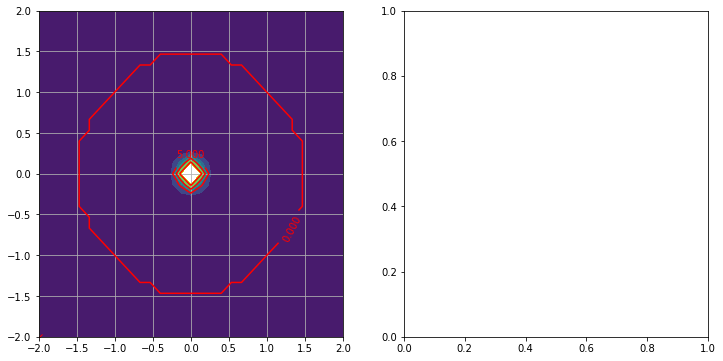

In [4]:
def wrapTFmethod(tfunc,sess = None):
    '''Safely call tensorflow method as np method
'''
    def gfunc(x):
        if isinstance(x,np.ndarray):
            x = x.astype(np.float32)
        y = tfunc(x).eval(session = sess)
    return y
def arrayFunc2mgridFunc(arrayFunc):
    def mgridFunc(*x):
        ''' x = [xgrid,ygrid]
'''
    #     print (map(np.shape,x))
        shape = x[0].shape 
        X = np.vstack(map(np.ravel,x)).T ### compatible with TF
        val = arrayFunc(X,)
        val = np.reshape(val,shape,)
        return val
    return mgridFunc
reload(pyvis)
# R = 5.

# f(*)
pyvis.dmet_2d(f,vectorised=1,bins=np.linspace(-R,R,50));

In [5]:
# reload(pytf)

In [5]:
reload(pytf)

<module 'pymisca.tensorflow_extra' from '/home/shouldsee/.local/lib/python2.7/site-packages/pymisca/tensorflow_extra.pyc'>

In [8]:
pytf.TransformedDistribution??

In [126]:
import edward.util as edu
# edu.get_parents_p
m._graph_parents

[<tf.Tensor 'Uniform_36/low:0' shape=() dtype=float32>,
 <tf.Tensor 'Uniform_36/high:0' shape=() dtype=float32>,
 <tf.Tensor 'MultivariateNormalDiag_194/loc:0' shape=(3,) dtype=float32>,
 <tf.Tensor 'MultivariateNormalDiag_193/init/make_diag_scale/scale_diag:0' shape=(3,) dtype=float32>]

In [7]:
# X = m.lo
logP = m.log_prob(X).eval()
logP.shape
logP[:10],logP.min()

(array([-3.9644465, -4.056208 , -3.3314853, -3.8607388, -4.1659565,
        -3.8780131, -3.7113972, -4.0104423, -4.025052 , -4.0217867],
       dtype=float32), -4.2610655)

In [110]:
# ??m._sample_n
# X = m.distribution.sample(100).eval()
X = odist.sample(5000).eval()

xshape (5000, 3)
forward_sp (5000, 3)
forward_xy (5000, 3) (5000, 3)


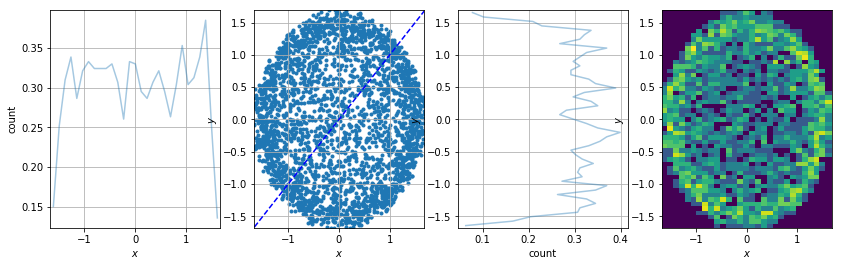

In [90]:
pyvis.qc_2var(X.T[0],X.T[1])

In [38]:
m.prob(X).eval().shape

(2000, 3)

In [39]:
m.sample(100)

<tf.Tensor 'MultivariateNormalDiag_68/sample/Reshape:0' shape=(100, 3) dtype=float32>

In [31]:
X.shape

(2000, 1, 3)

3


TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
import scipy.stats as spstat


In [ ]:
??tf.contrib.distributions.TransformedDistribution

In [ ]:
bjt._

In [ ]:
import pymisca.vis_util as pyvis
%matplotlib inline

In [ ]:
tf.contrib.distributions.bijectors.Bijector??

In [ ]:
tf.contrib.distributions.TransformedDistribution??

In [ ]:
m.sample().get_shape()

$$
y_i = \exp(x_i)\\
\partial y_i /\partial x_i = \exp(x_i)\\
\partial x_i /\partial y_i = \exp(-x_i)\\
\log[\partial x_i /\partial y_i ]= -\log y_i\\
$$

```python
exp = Inline(
  forward_fn=tf.exp,
  inverse_fn=tf.log,
  inverse_log_det_jacobian_fn=(
    lambda y: -tf.reduce_sum(tf.log(y), axis=-1)),
  name="exp")
```

In [ ]:
tf.contrib.distributions.M